# Linear Regression

## import and preprocessing

In [62]:
import pandas as pd
import numpy as np

automobile_data = pd.read_csv("../../../data/auto-mpg.csv")

automobile_data.shape

(398, 9)

In [63]:
print("shape before : ", automobile_data.shape)
automobile_data = automobile_data.replace("?", np.nan)
automobile_data.dropna(inplace= True)
print("shape after : ", automobile_data.shape)

shape before :  (398, 9)
shape after :  (392, 9)


In [64]:
automobile_data.drop(columns = ["origin", "car name"], axis = 1, inplace = True)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [65]:
automobile_data["model year"] = automobile_data["model year"].astype(str).apply(
    lambda x: "19" + x if not x.startswith("19") else x
).astype(int)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,1970
1,15.0,8,350.0,165,3693,11.5,1970
2,18.0,8,318.0,150,3436,11.0,1970
3,16.0,8,304.0,150,3433,12.0,1970
4,17.0,8,302.0,140,3449,10.5,1970


In [66]:
import datetime

now = datetime.datetime.now()
automobile_data["age"] = now.year - automobile_data["model year"].astype(int)
automobile_data.drop(columns = ["model year"], inplace = True)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130,3504,12.0,55
1,15.0,8,350.0,165,3693,11.5,55
2,18.0,8,318.0,150,3436,11.0,55
3,16.0,8,304.0,150,3433,12.0,55
4,17.0,8,302.0,140,3449,10.5,55


In [67]:
automobile_data["horsepower"] = automobile_data["horsepower"].astype(float)
automobile_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   age           392 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 24.5 KB


In [68]:
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,18.0,8,307.0,130.0,3504,12.0,55
1,15.0,8,350.0,165.0,3693,11.5,55
2,18.0,8,318.0,150.0,3436,11.0,55
3,16.0,8,304.0,150.0,3433,12.0,55
4,17.0,8,302.0,140.0,3449,10.5,55


## Visualization

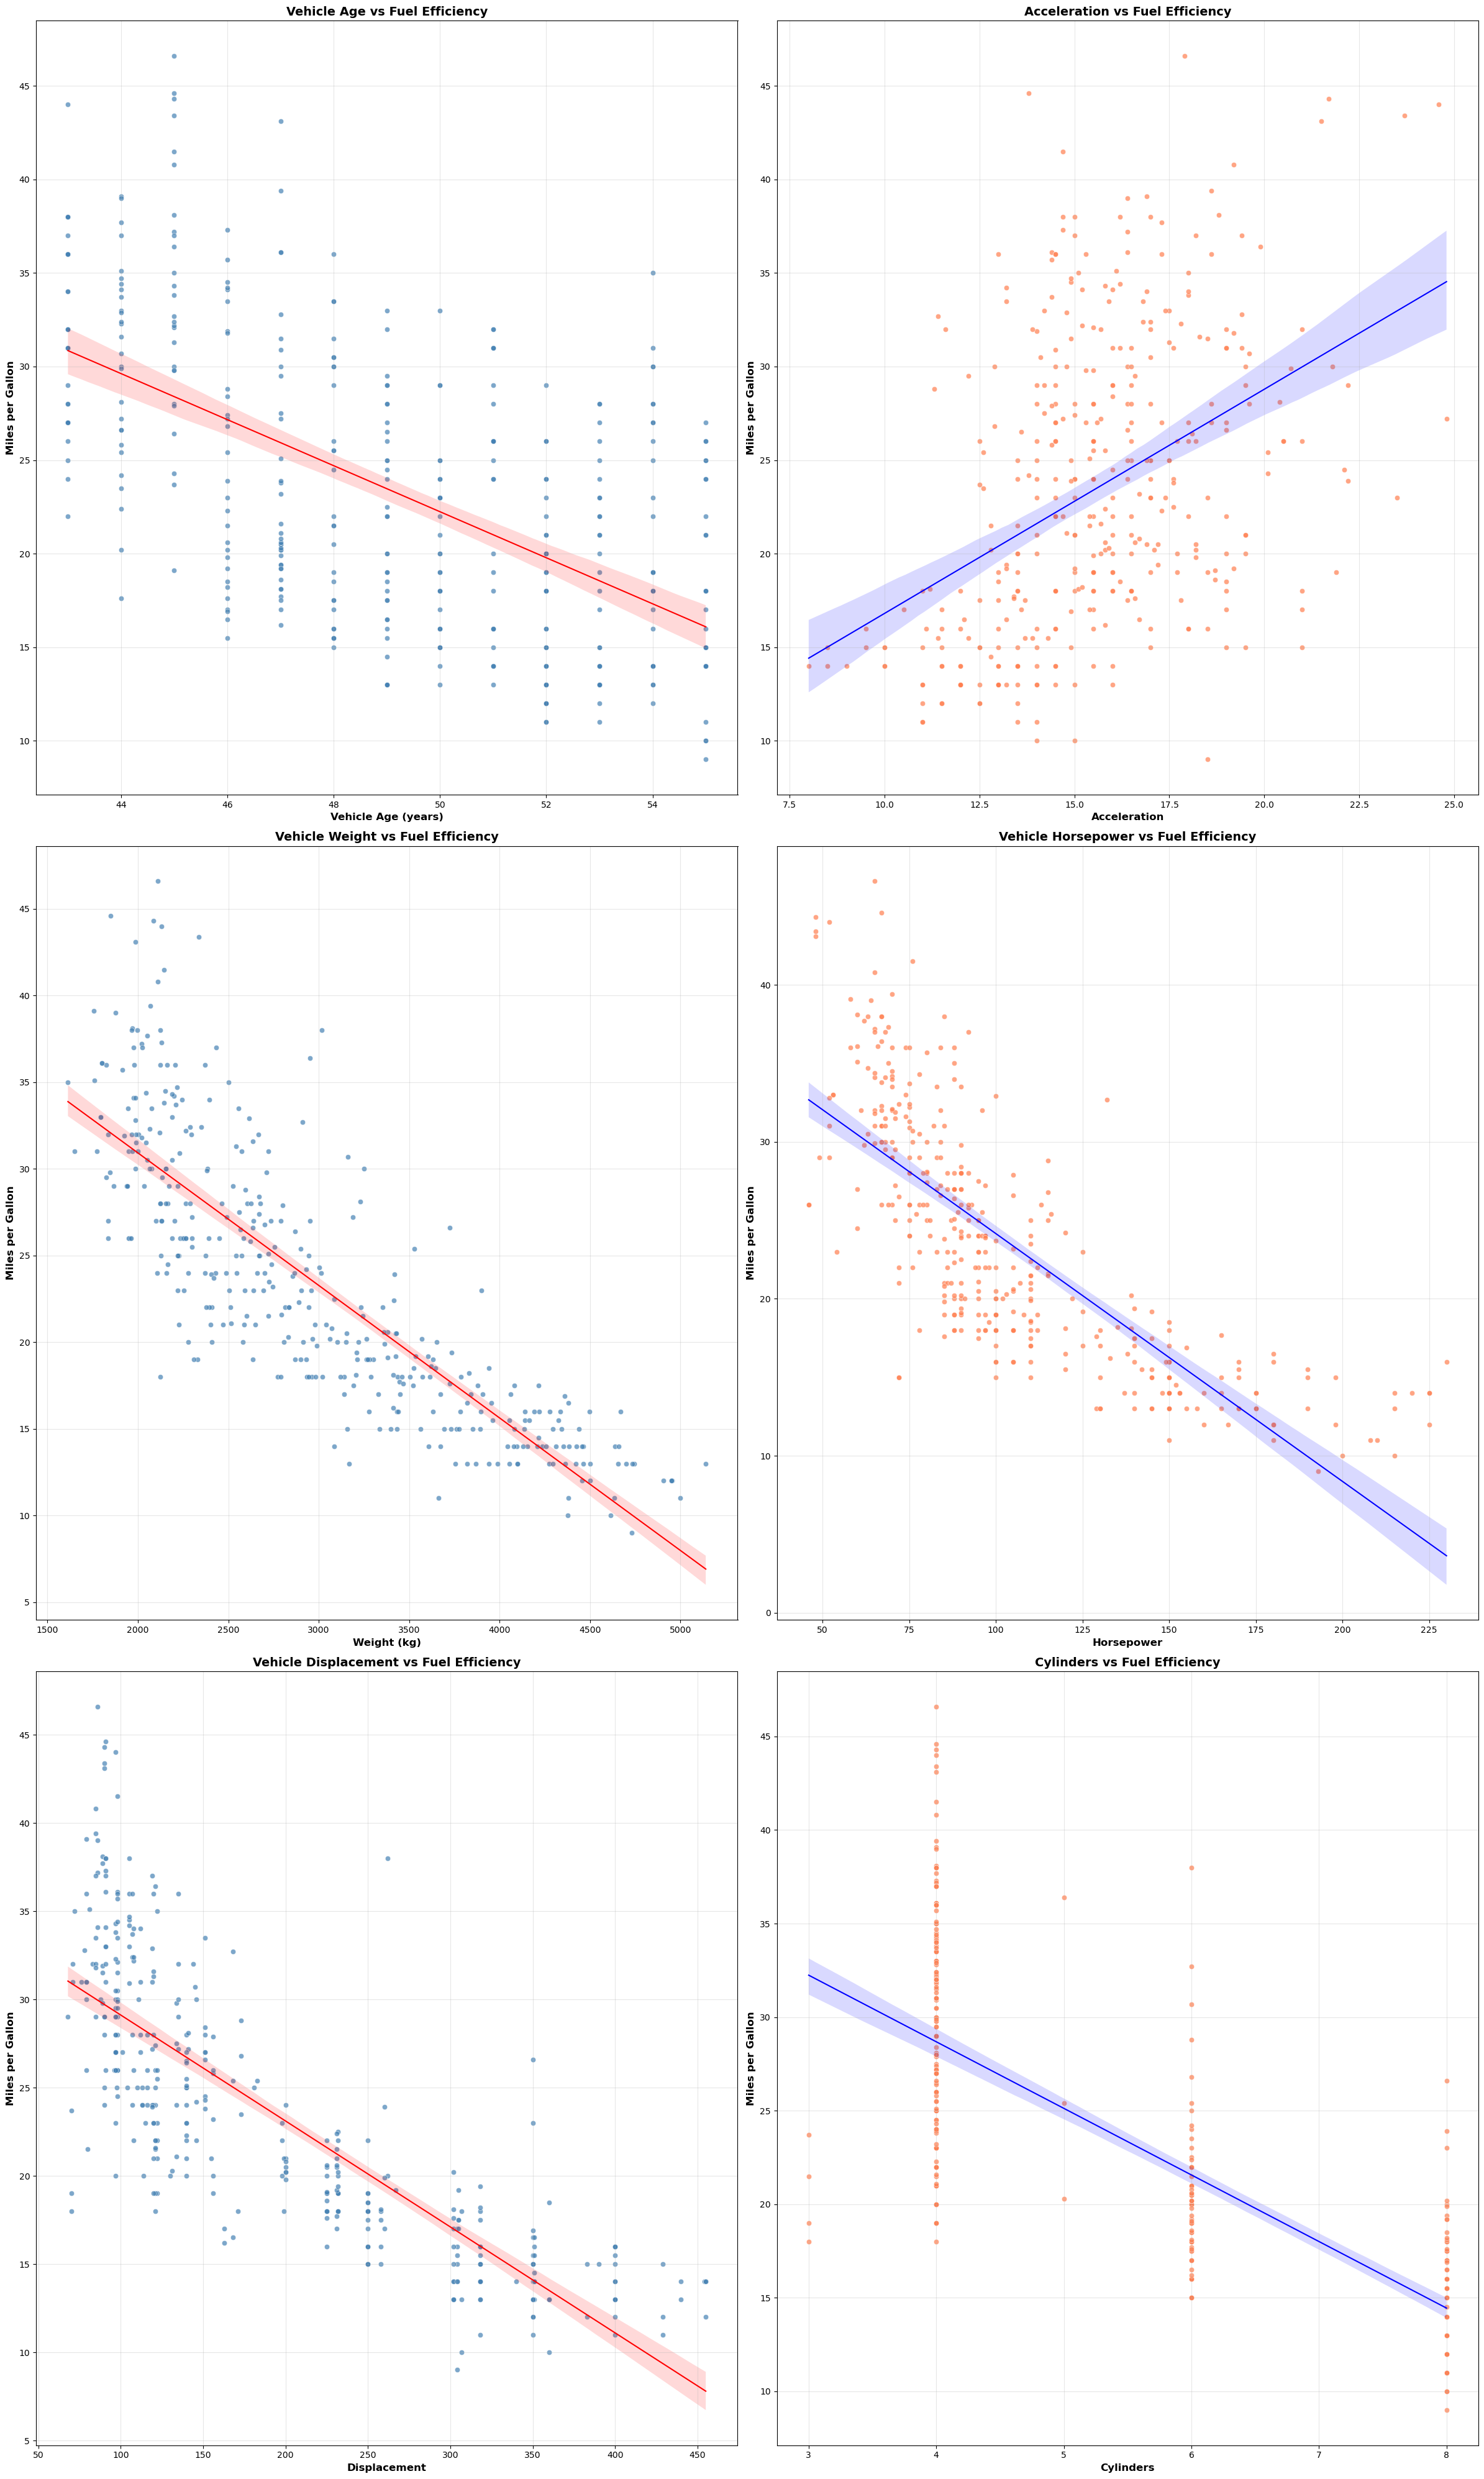

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots with better sizing
fig, axes = plt.subplots(3, 2, figsize=(24, 40))

# First subplot - Age vs MPG
sns.scatterplot(x=automobile_data["age"], y=automobile_data["mpg"], ax=axes[0, 0], alpha=0.7, color='steelblue')
sns.regplot(x=automobile_data["age"], y=automobile_data["mpg"], ax=axes[0, 0], 
            scatter=False, color='red', line_kws={'linewidth': 1.5})
axes[0, 0].set_xlabel("Vehicle Age (years)", fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')
axes[0, 0].set_title("Vehicle Age vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Second subplot - Acceleration vs MPG
sns.scatterplot(x=automobile_data["acceleration"], y=automobile_data["mpg"], ax=axes[0, 1], alpha=0.7, color='coral')
sns.regplot(x=automobile_data["acceleration"], y=automobile_data["mpg"], ax=axes[0, 1], 
            scatter=False, color='blue', line_kws={'linewidth': 1.5})
axes[0, 1].set_xlabel("Acceleration", fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')  # Fixed: was axes[0]
axes[0, 1].set_title("Acceleration vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# First subplot - Age vs MPG
sns.scatterplot(x=automobile_data["weight"], y=automobile_data["mpg"], ax=axes[1, 0], alpha=0.7, color='steelblue')
sns.regplot(x=automobile_data["weight"], y=automobile_data["mpg"], ax=axes[1, 0], 
            scatter=False, color='red', line_kws={'linewidth': 1.5})
axes[1, 0].set_xlabel("Weight (kg)", fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')
axes[1, 0].set_title("Vehicle Weight vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Second subplot - Acceleration vs MPG
sns.scatterplot(x=automobile_data["horsepower"], y=automobile_data["mpg"], ax=axes[1, 1], alpha=0.7, color='coral')
sns.regplot(x=automobile_data["horsepower"], y=automobile_data["mpg"], ax=axes[1, 1], 
            scatter=False, color='blue', line_kws={'linewidth': 1.5})
axes[1, 1].set_xlabel("Horsepower", fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')  # Fixed: was axes[0]
axes[1, 1].set_title("Vehicle Horsepower vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# First subplot - Age vs MPG
sns.scatterplot(x=automobile_data["displacement"], y=automobile_data["mpg"], ax=axes[2, 0], alpha=0.7, color='steelblue')
sns.regplot(x=automobile_data["displacement"], y=automobile_data["mpg"], ax=axes[2, 0], 
            scatter=False, color='red', line_kws={'linewidth': 1.5})
axes[2, 0].set_xlabel("Displacement", fontsize=12, fontweight='bold')
axes[2, 0].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')
axes[2, 0].set_title("Vehicle Displacement vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[2, 0].grid(True, alpha=0.3)

# Second subplot - Acceleration vs MPG
sns.scatterplot(x=automobile_data["cylinders"], y=automobile_data["mpg"], ax=axes[2, 1], alpha=0.7, color='coral')
sns.regplot(x=automobile_data["cylinders"], y=automobile_data["mpg"], ax=axes[2, 1], 
            scatter=False, color='blue', line_kws={'linewidth': 1.5})
axes[2, 1].set_xlabel("Cylinders", fontsize=12, fontweight='bold')
axes[2, 1].set_ylabel("Miles per Gallon", fontsize=12, fontweight='bold')  # Fixed: was axes[0]
axes[2, 1].set_title("Cylinders vs Fuel Efficiency", fontsize=14, fontweight='bold')
axes[2, 1].grid(True, alpha=0.3)



# Adjust layout and display
plt.tight_layout()
plt.show()

In [71]:
automobile_corr = automobile_data.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


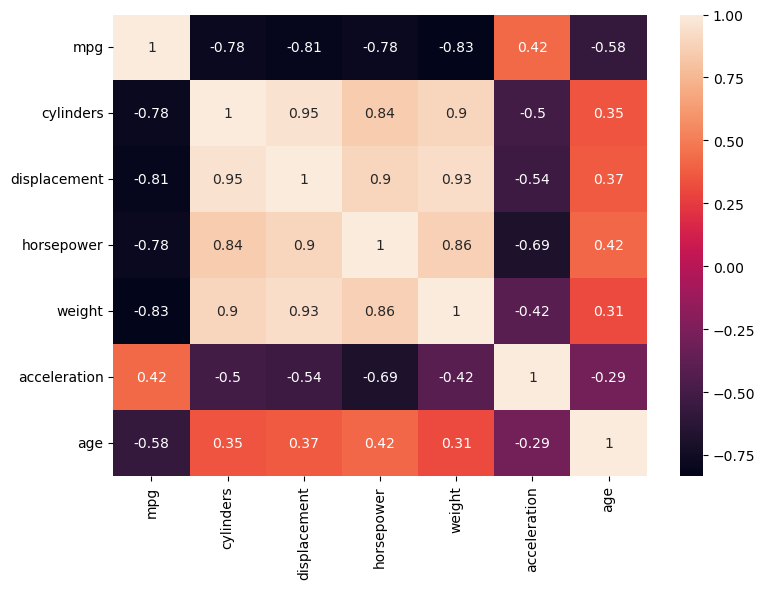

In [72]:
fig, axes = plt.subplots(figsize = (8, 6))
sns.heatmap(automobile_corr, annot= True)
plt.tight_layout()
plt.show()

In [73]:
automobile_data = automobile_data.sample(frac = 1).reset_index(drop = True)
automobile_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,25.0,4,90.0,71.0,2223,16.5,50
1,22.0,6,198.0,95.0,2833,15.5,55
2,23.9,4,119.0,97.0,2405,14.9,47
3,13.0,8,302.0,140.0,4294,16.0,53
4,39.4,4,85.0,70.0,2070,18.6,47


In [74]:
automobile_data.to_csv("../../../data/auto-mpg-processed.csv")